### This is The Fourth and The Last Part of Model Design Stage 

### Part 4 ==============================> All Features Based Similarity

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.metrics.pairwise import pairwise_distances
from difflib import SequenceMatcher
import nltk
from keras.applications import xception
from keras.applications.xception import preprocess_input
from nltk.corpus import stopwords
import requests
import os
import shutil
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from PIL import Image
from io import BytesIO
from gensim.models import Word2Vec, KeyedVectors
# Importing function from another notebook
# So that we don't have to write them back
import import_ipynb
# Have to be in the same directory or path
from Title_Based_Similarity import idf_w2v, display_image
from Image_Similarity import get_similarity

# Final Model

In [ ]:
data = pd.read_pickle("pickle_data4")

In [ ]:
vocab = word2vec.vocab
print(len(vocab))

2000000


In [ ]:
idf_vectorizer = TfidfVectorizer(use_idf = True)
idf_vectorizer.fit_transform(df["title"])
idf = idf_vectorizer.idf_
idf_vocab = idf_vectorizer.vocabulary_

In [ ]:
corpus_w2v = []

for i in df['title']:
  corpus_w2v.append(idf_w2v(i))

corpus_w2v = np.array(corpus_w2v)

In [ ]:
brands = [i.replace(" ", "-") for i in df["brand"].values]
types = [i.replace(" ", "-") for i in df["product_type_name"].values]

In [ ]:
OneHot = OneHotEncoder()
types_encoded = OneHot.fit_transform(np.array(types).reshape(-1, 1)) # we use here -1 because we don't know how many rows and 1 because we need to treat each vector as one feature 
print(types_encoded.get_shape())
brands_encoded = OneHot.fit_transform(np.array(brands).reshape(-1, 1))
print(brands_encoded.get_shape())

(109495, 42)
(109495, 10110)


In [ ]:
def get_final_similar(index, k, title_weight, type_weight, brand_weight, image_weight):
  
  # It's neccessary to reshape(1, -1) at title instance because it's vector 300 dims so to consider it as one instance with 300 feature
  # Get title based instance
  title_distances = pairwise_distances(corpus_w2v[index].reshape(1, -1), corpus_w2v) * title_weight
  # Get type based distance
  type_distances = pairwise_distances(types_encoded[index], types_encoded) * type_weight
  # Get brand based distance
  brand_distances = pairwise_distances(brands_encoded[index], brands_encoded) * brand_weight
  # Get image based distance
  images_distance = get_similarity(index) * image_weight
  # 1e-7 so we don't divide by zero or one can use exceptions
  distances = (title_distances + type_distances + brand_distances + images_distance) / (title_weight + type_weight + brand_weight + image_weight + 1e-7)
  
  # get the indices of the most similar products (the nearest), we only care about the first k point the uses set
  indices_of_nearest = np.argsort(distances.flatten())[:k]
  # get the actual distance from the query product, we only care about the first k point the uses set
  value_of_nearest = np.sort(distances.flatten())[:k]
  
  for i in range(k):
    if i == 0:
      print("Query Data:")
    row = df.loc[indices_of_nearest[i]]
    display_image(row["large_image_url"])
    print("ASIN:", row["asin"])
    print("Type:", row["product_type_name"])
    print("Brand:", row["brand"])
    print("Title:", row["title"])
    print("Distance between two data points =", int(value_of_nearest[i]))
    print("-" * 100)

Query Data:


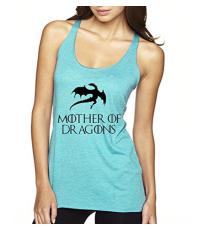

ASIN: B01LTAPR7K
Type: SHIRT
Brand: Wild Bobby
Title: mother of dragons got premium triblend racerback womens tank top 
Distance between two data points = 0
----------------------------------------------------------------------------------------------------


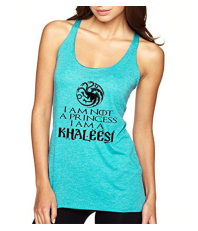

ASIN: B01LTCE2Q0
Type: SHIRT
Brand: Wild Bobby
Title: i am not a princess i a khaleesi got premium triblend racerback womens tank top 
Distance between two data points = 16
----------------------------------------------------------------------------------------------------


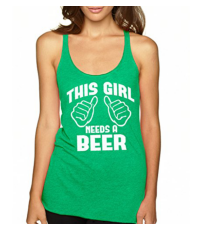

ASIN: B010TWTP2C
Type: SHIRT
Brand: SignatureTshirts
Title: signaturetshirts womens saint patricks this girl needs a beer racerback tank 
Distance between two data points = 26
----------------------------------------------------------------------------------------------------


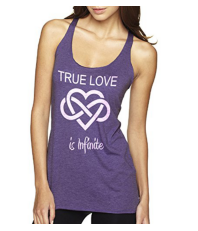

ASIN: B01NCY7WIW
Type: SHIRT
Brand: Vicko
Title: true love infinite vicko womens premium triblend racerback tank 
Distance between two data points = 26
----------------------------------------------------------------------------------------------------


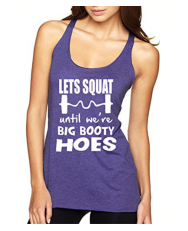

ASIN: B06X19GGRQ
Type: SHIRT
Brand: The Workout Princess
Title: lets squat until were big booty hoes  funny printed tank top workout fitness shirt deep round neck sleeveless women 
Distance between two data points = 27
----------------------------------------------------------------------------------------------------


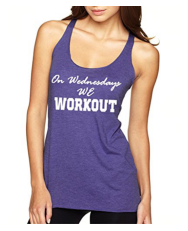

ASIN: B06VVTHS4S
Type: SHIRT
Brand: The Workout Princess
Title: motivation inspiration sexy fitness apparel womens wednesdays workout tank pink 
Distance between two data points = 27
----------------------------------------------------------------------------------------------------


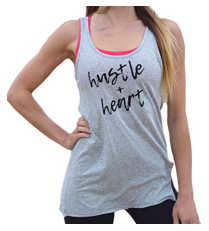

ASIN: B074Y9P66M
Type: SHIRT
Brand: Life By Lexie
Title: life by lexie hustle  heart tank top gray 
Distance between two data points = 27
----------------------------------------------------------------------------------------------------


In [ ]:
get_final_similar(index = 5, k = 7, title_weight = 15, brand_weight = 5, type_weight = 10, image_weight = 30)

Query Data:


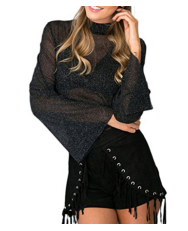

ASIN: B01N4I1MXQ
Type: SHIRT
Brand: Mansy
Title: mansy womens flouncing trumpet sleeve blouse tops 
Distance between two data points = 0
----------------------------------------------------------------------------------------------------


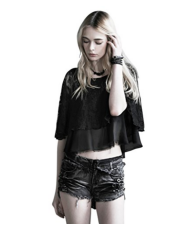

ASIN: B0159VJ5SC
Type: APPAREL
Brand: Punk Rave
Title: black lace shirt women tops comfortable wear fashion short blouse one size 
Distance between two data points = 36
----------------------------------------------------------------------------------------------------


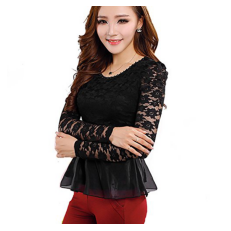

ASIN: B072HQZB9P
Type: SHIRT
Brand: LOCOMO Tops
Title: lafon lace crochet floral see through sheer ruffle peplum blouse ffk062blkl 
Distance between two data points = 37
----------------------------------------------------------------------------------------------------


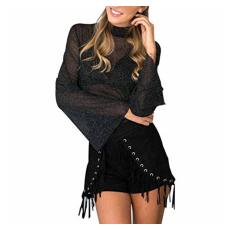

ASIN: B06VZ3Y24B
Type: SHIRT
Brand: EFINNY
Title: efinny womens hollow stretch long sleeve tops tshirt blouse 
Distance between two data points = 38
----------------------------------------------------------------------------------------------------


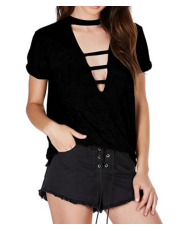

ASIN: B0711H7F4B
Type: SHIRT
Brand: Allegrace
Title: allegrace womens summer cut out v neck t shirts short sleeve halter tees tops 
Distance between two data points = 38
----------------------------------------------------------------------------------------------------


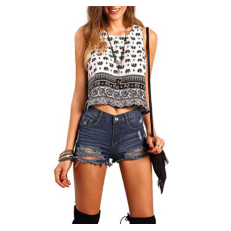

ASIN: B073WW5BZX
Type: SHIRT
Brand: WM & MW
Title: elephant tank tops wm  mw women printing sleeveless short blouse 
Distance between two data points = 38
----------------------------------------------------------------------------------------------------


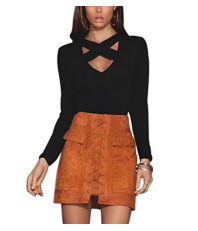

ASIN: B01MCUQ8EW
Type: SHIRT
Brand: Sumtory
Title: sumtory women sexy bandage hollow out long sleeve t shirt crop tops 
Distance between two data points = 38
----------------------------------------------------------------------------------------------------


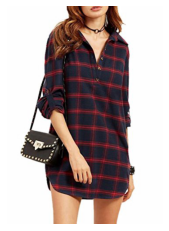

ASIN: B073W958G7
Type: DRESS
Brand: ainr
Title: ainr womens plaid v neck roll up long sleeve shirt short dress 
Distance between two data points = 38
----------------------------------------------------------------------------------------------------


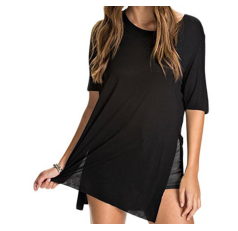

ASIN: B01G8331YE
Type: SHIRT
Brand: OUCHI®
Title: ouchi women round neck loose pullover top solid side slit midlong shirt 
Distance between two data points = 38
----------------------------------------------------------------------------------------------------


In [ ]:
get_final_similar(99001, 9, 15, 5, 10, 30)

Query Data:


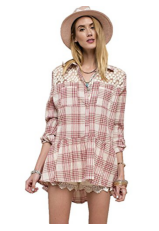

ASIN: B01G9PGT40
Type: SHIRT
Brand: Easel
Title: easel womens gauzy plaid button down shirt 
Distance between two data points = 0
----------------------------------------------------------------------------------------------------


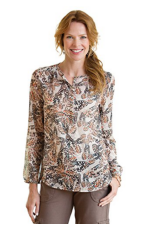

ASIN: B072BXVFSL
Type: SHIRT
Brand: Pajama Jeans
Title: pajamajeans monarch blouse butterfly print g04723 
Distance between two data points = 34
----------------------------------------------------------------------------------------------------


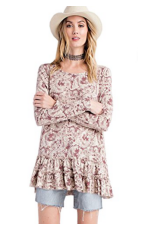

ASIN: B073YKCDQD
Type: SHIRT
Brand: Easel Clothing
Title: easel clothing celian ruffle shirt extender dress layering top mauve print tops 
Distance between two data points = 35
----------------------------------------------------------------------------------------------------


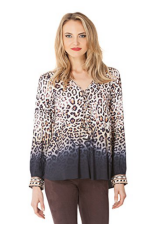

ASIN: B075326RG6
Type: SHIRT
Brand: Hale Bob
Title: hassina satin blouse 
Distance between two data points = 36
----------------------------------------------------------------------------------------------------


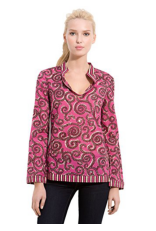

ASIN: B00VFDPN4O
Type: SHIRT
Brand: Tory Burch
Title: tory burch pink stephanie mandarin collar print tunic shirt top 8 medium 295 
Distance between two data points = 37
----------------------------------------------------------------------------------------------------


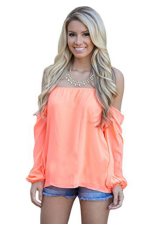

ASIN: B071NDJY5J
Type: SHIRT
Brand: Prime Leader's Blouses
Title: prime leader orange off the shoulder blouse for women 
Distance between two data points = 37
----------------------------------------------------------------------------------------------------


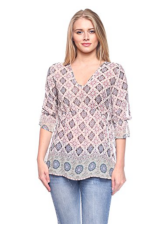

ASIN: B01ICBLB42
Type: SHIRT
Brand: rokoko by Dazz
Title: rokoko womens printed peasant blouse top 
Distance between two data points = 38
----------------------------------------------------------------------------------------------------


In [ ]:
get_final_similar(index = 9888, k = 7, title_weight = 15, brand_weight = 5, type_weight = 10, image_weight = 40)

Query Data:


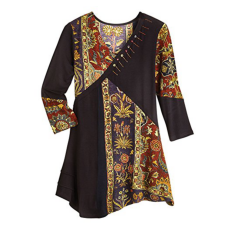

ASIN: B073SKH4W2
Type: SHIRT
Brand: Parsley & Sage
Title: womens tunic top  floral tapestry patchwork long sleeve blouse 
Distance between two data points = 0
----------------------------------------------------------------------------------------------------


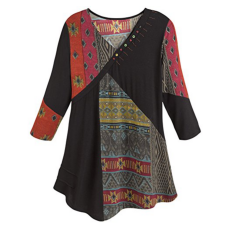

ASIN: B01I3KDS8O
Type: SHIRT
Brand: Parsley & Sage
Title: womens tunic top red and black tapestry print patchwork shirt 
Distance between two data points = 30
----------------------------------------------------------------------------------------------------


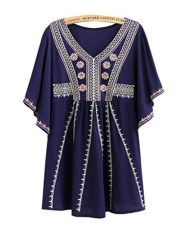

ASIN: B06XY9L1JW
Type: SHIRT
Brand: Kafeimali
Title: kafeimali womens tshirt mini dress mexican embroidered peasant tops blouses 
Distance between two data points = 32
----------------------------------------------------------------------------------------------------


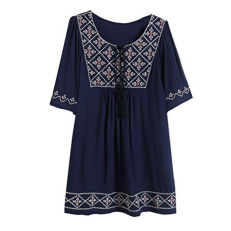

ASIN: B01IA6SZ4I
Type: SHIRT
Brand: Ashir Aley
Title: ashir aley cute lovely embroidered peasant dressy tunic tops bohemian mexican blouse 
Distance between two data points = 33
----------------------------------------------------------------------------------------------------


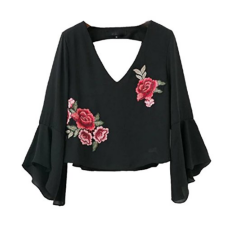

ASIN: B0739RZHPK
Type: SHIRT
Brand: XiaoShop
Title: xiaoshop womens stylish sexy v neck rose embroidery t shirts blouse 
Distance between two data points = 34
----------------------------------------------------------------------------------------------------


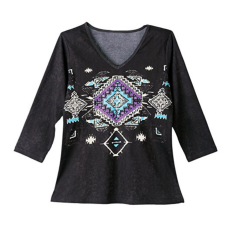

ASIN: B011AYPIMY
Type: SHIRT
Brand: Collections Etc
Title: womens southwestern v neck albuquerque top 
Distance between two data points = 36
----------------------------------------------------------------------------------------------------


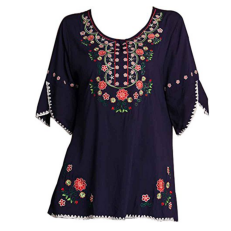

ASIN: B0723B1YCW
Type: SHIRT
Brand: Ashir Aley
Title: ashir aley womens girls embroidered peasant tops mexican bohemian blouses 
Distance between two data points = 37
----------------------------------------------------------------------------------------------------


In [ ]:
get_final_similar(index = 92371, k = 7, title_weight = 20, brand_weight = 5, type_weight = 10, image_weight = 40)

Combining all feature togeather is as good as image and it does not suffre from lack of diversity in my opinion so when changing weights of each feature you can prefer for example the same brand if you want to get most similar brand or the type or the color if we have kept color feature.

# Further Imporvments

1.   You can include another feature like price and get only similar products in specific range of price.

2.   Include color feature to prefere similar products with same color or similar product only.

3. Train CNN Model rather than using Transfer Learning.

4. Train Word2Vec on the corpus we have rather than using Google News model.

5. Try to use unsuprvised algorithm like K-Medoids / K-Means or DBSCAN to gather similar product togeather.